<a href="https://colab.research.google.com/github/AliceKitchkin/Unsupervised-Machine-Learning/blob/main/FifaPlayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Bibliotheken und Daten Import

In [179]:
# handle table-like data and matrices
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# pca
from sklearn.decomposition import PCA

# clustering
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift

# evaluations
from sklearn.metrics import adjusted_rand_score, davies_bouldin_score, calinski_harabasz_score, silhouette_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [180]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [181]:
data_players = pd.read_csv("/content/drive/MyDrive/Bachelorarbeit/CSV/FifaPlayer.csv")

#Overview

In [182]:
data_players.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur  age         dob  height_cm  \
0       93         93   78000000.0  320000.0   34  1987-06-24        170   
1       92         92  119500000.0  270000.0   32  1988-08-21        185   
2       91         91   45000000.0  270000.0   36  1985-02-05        187   
3       91         91  129000000.0  270000.0   29  1992-02-05        175   
4       91         91  125500000.0  350000.0   30  1991-06-28        181   

   weight_kg  club_team_id            club_name             league_name  \
0         72          73.0  Paris Saint-Germain          French Ligue 1   
1         81          21.0    FC Bayern München    German 1. Bundesliga   
2         83          11.0    Manchester United  English Premier League   
3         68          73.0  Paris Saint-Germain          French Ligue 1   
4         70          10.0      Manchester City  English Premier League   

   league_level club_position  club_jersey_number club_loaned_from  \
0           1.0            RW                30.0              NaN   
1           1.0            ST                 9.0              NaN   
2           1.0            ST                 7.0              NaN   
3           1.0            LW                10.0              NaN   
4           1.0           RCM                17.0              NaN   

  club_joined  club_contract_valid_until  nationality_id nationality_name  \
0  2021-08-10                     2023.0              52        Argentina   
1  2014-07-01                     2023.0              37           Poland   
2  2021-08-27                     2023.0              38         Portugal   
3  2017-08-03                     2025.0              54           Brazil   
4  2015-08-30                     2025.0               7          Belgium   

   nation_team_id nation_position  nation_jersey_number preferred_foot  \
0          1369.0              RW                  10.0           Left   
1          1353.0              RS                   9.0          Right   
2          1354.0              ST                   7.0          Right   
3             NaN             NaN                   NaN          Right   
4          1325.0             RCM                   7.0          Right   

   weak_foot  skill_moves  international_reputation    work_rate body_type  \
0          4            4                         5   Medium/Low    Unique   
1          4            4                         5  High/Medium    Unique   
2          4            5                         5     High/Low    Unique   
3          5            5                         5  High/Medium    Unique   
4          5            4                         4    High/High    Unique   

  real_face  release_clause_eur  \
0       Yes         144300000.0   
1       Yes         197200000.0   
2       Yes          83300000.0   
3       Yes         238700000.0   
4       Yes         232200000.0   

                                         player_tags  \
0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
1  #Aerial Threat, #Distance Shooter, #Clinical F...   
2  #Aerial Threat, #Dribbler, #Distance Shoote

In [183]:
data_players.shape

(19239, 110)

In [184]:
data_players.describe()

sofifa_id       overall     potential     value_eur       wage_eur  \
count   19239.000000  19239.000000  19239.000000  1.916500e+04   19178.000000   
mean   231468.086959     65.772182     71.079370  2.850452e+06    9017.989363   
std     27039.717497      6.880232      6.086213  7.613700e+06   19470.176724   
min        41.000000     47.000000     49.000000  9.000000e+03     500.000000   
25%    214413.500000     61.000000     67.000000  4.750000e+05    1000.000000   
50%    236543.000000     66.000000     71.000000  9.750000e+05    3000.000000   
75%    253532.500000     70.000000     75.000000  2.000000e+06    8000.000000   
max    264640.000000     93.000000     95.000000  1.940000e+08  350000.000000   

                age     height_cm     weight_kg   club_team_id  league_level  \
count  19239.000000  19239.000000  19239.000000   19178.000000  19178.000000   
mean      25.210822    181.299704     74.943032   50580.498123      1.354364   
std        4.748235      6.863179      7.069434   54401.868535      0.747865   
min       16.000000    155.000000     49.000000       1.000000      1.000000   
25%       21.000000    176.000000     70.000000     479.000000      1.000000   
50%       25.000000    181.000000     75.000000    1938.000000      1.000000   
75%       29.000000    186.000000     80.000000  111139.000000      1.000000   
max       54.000000    206.000000    110.000000  115820.000000      5.000000   

       club_jersey_number  club_contract_valid_until  nationality_id  \
count        19178.000000               19178.000000    19239.000000   
mean            20.945250                2022.764000       58.602682   
std             17.909369                   1.213203       50.298614   
min              1.000000                2021.000000        1.000000   
25%              9.000000                2022.000000       21.000000   
50%             18.000000                2022.000000       45.000000   
75%             27.000000                2024.000000       60.000000   
max             99.000000                2031.000000      219.000000   

       nation_team_id  nation_jersey_number     weak_foot   skill_moves  \
count      759.000000            759.000000  19239.000000  19239.000000   
mean     14480.848485             12.567852      2.946151      2.352461   
std      35328.730217              7.039116      0.671560      0.767659   
min       1318.000000              1.000000      1.000000      1.000000   
25%       1338.000000              7.000000      3.000000      2.000000   
50%       1357.000000             12.000000      3.000000      2.000000   
75%       1386.000000             19.000000      3.000000      3.000000   
max     111473.000000             28.000000      5.000000      5.000000   

       international_reputation  release_clause_eur          pace  \
count              19239.000000        1.806300e+04  17107.000000   
mean                   1.094184        5.374044e+06     68.213071   
std                    0.371098        1.494837e+07     10.933155   
min                    1.000000        1.600000e+04     28.000000   
25%                    1.000000        8.060000e+05     62.000000   
50%                    1.000000        1.600000e+06     69.000000   
75%                    1.000000        3.700000e+06     76.000000   
max                    5.000000        3.735000e+08     97.000000   

           shooting       passing     dribbling     defending        physic  \
count  17107.000000  17107.000000  17107.000000  17107.000000  17107.000000   
mean      52.345297     57.312562     62.561174     51.703630     64.823289   
std       14.051623     10.068965      9.651312     16.189746      9.791886   
min       18.000000     25.000000     27.000000     14.000000     29.000000   
25%       42.000000     51.000000     57.000000     37.000000     59.000000   
50%       54.000000     58.000000     64.000000     56.000000     66.000000   
75%       63.000000     64.000000     69.000000     64.00000

In [185]:
#get only the columns
data_players.describe().columns

Index(['sofifa_id', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'height_cm', 'weight_kg', 'club_team_id', 'league_level',
       'club_jersey_number', 'club_contract_valid_until', 'nationality_id',
       'nation_team_id', 'nation_jersey_number', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision

#Datensatz vorbereiten

In [186]:
#before mean fill
data_players.isna().sum()

sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url          61
club_flag_url          61
nation_logo_url     18480
nation_flag_url         0
Length: 110, dtype: int64

In [187]:
#handling missing values
data_players = data_players.fillna(data_players.mean())

In [188]:
#after mean fill
data_players.isna().sum()

sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url          61
club_flag_url          61
nation_logo_url     18480
nation_flag_url         0
Length: 110, dtype: int64

In [189]:
data_original = data_players[['short_name', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'height_cm', 'weight_kg', 'club_team_id', 'league_level',
       'club_jersey_number', 'club_contract_valid_until', 'nationality_id',
       'nation_team_id', 'nation_jersey_number', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']]

In [190]:
#Namen der Spieler speichern
names = data_original.short_name.tolist()

#short_name Spalte löschen
data_original = data_original.drop(['short_name'], axis=1)

#Values speichern
data_original_values = data_original.values

In [191]:
data_original.head()

overall  potential    value_eur  wage_eur  age  height_cm  weight_kg  \
0       93         93   78000000.0  320000.0   34        170         72   
1       92         92  119500000.0  270000.0   32        185         81   
2       91         91   45000000.0  270000.0   36        187         83   
3       91         91  129000000.0  270000.0   29        175         68   
4       91         91  125500000.0  350000.0   30        181         70   

   club_team_id  league_level  club_jersey_number  club_contract_valid_until  \
0          73.0           1.0                30.0                     2023.0   
1          21.0           1.0                 9.0                     2023.0   
2          11.0           1.0                 7.0                     2023.0   
3          73.0           1.0                10.0                     2025.0   
4          10.0           1.0                17.0                     2025.0   

   nationality_id  nation_team_id  nation_jersey_number  weak_foot  \
0              52     1369.000000             10.000000          4   
1              37     1353.000000              9.000000          4   
2              38     1354.000000              7.000000          4   
3              54    14480.848485             12.567852          5   
4               7     1325.000000              7.000000          5   

   skill_moves  international_reputation  release_clause_eur  pace  shooting  \
0            4                         5         144300000.0  85.0      92.0   
1            4                         5         197200000.0  78.0      92.0   
2            5                         5          83300000.0  87.0      94.0   
3            5                         5         238700000.0  91.0      83.0   
4            4                         4         232200000.0  76.0      86.0   

   passing  dribbling  defending  physic  attacking_crossing  \
0     91.0       95.0       34.0    65.0                  85   
1     79.0       86.0       44.0    82.0                  71   
2     80.0       88.0       34.0    75.0                  87   
3     86.0       94.0       37.0    63.0                  85   
4     93.0       88.0       64.0    78.0                  94   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       91   
1                   95                          90                       85   
2                   95                          90                       80   
3                   83                          63                       86   
4                   82                          55                       94   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               96           93                 94   
1                 89               85           79                 85   
2                 86               88           81                 84   
3                 86               95           88                 87   
4                 82               88           85                 83   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  91                  96                     91   
1                  70                  88                     77   
2                  77                  88                     85   
3                  81                  95                     93   
4                  93                  91                     76   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     80                91                  94   
1                     79                77                  93   
2                     88                86                  94   
3                     89                96                  89   
4                     76                79                  91   

   movement_balance  power_shot_power  power_jumping  power_stam

#Feature Scaling

In [192]:
#Scaling with minMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_original)
data_scaled_df = pd.DataFrame(data_scaled)

#PCA

In [193]:
pca = PCA() #all components included
data_pca_df = pd.DataFrame(pca.fit_transform(data_scaled)) #runs the model on the data

Text(0, 0.5, 'Cumulative explained Variance')

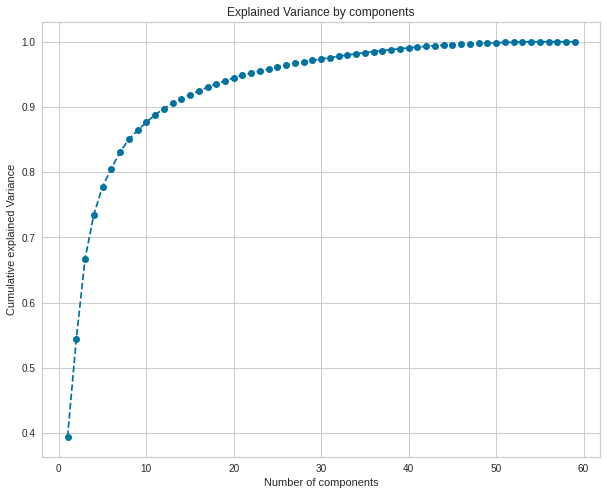

In [194]:
plt.figure(figsize=(10,8))
plt.plot(range(1,60), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained Variance')

#KMeans Clustering

##Daten kopieren

In [71]:
data_scaled_kmeans = data_scaled
data_scaled_df_kmeans = data_scaled_df

##PCA mit 90% Varianz ~ 13 Komponenten

In [74]:
pca_90_kmeans = PCA(n_components=0.9)
data_pca_90_kmeans = pd.DataFrame(pca_90_kmeans.fit_transform(data_scaled_kmeans)) #runs the model on the data

In [75]:
data_pca_90_kmeans.head()

0         1         2         3         4         5         6   \
0 -1.799933 -1.303398  0.684457  0.854284 -0.249590 -0.129964  0.025410   
1 -1.670038 -0.816557  0.752538  1.004640  0.361214 -0.333538 -0.154012   
2 -1.705546 -1.130828  0.726772  0.933675  0.296940 -0.419569 -0.245382   
3 -1.773266 -1.201199  0.664909  0.704449 -0.362723 -0.237234 -0.080222   
4 -1.907847 -0.410986  0.799741  1.073791 -0.293861  0.080018 -0.026147   

         7         8         9         10        11        12  
0  0.263021 -0.078782  0.211687 -0.046872  0.415777  0.548527  
1  0.223116 -0.160371  0.216789 -0.101732  0.402291  0.356355  
2  0.184944 -0.163661  0.192166 -0.118860  0.279812  0.508242  
3  0.231102 -0.268392  0.483457  0.116421  0.380749  0.503941  
4  0.267423 -0.105235  0.417341  0.196973  0.252377  0.185732

##PCA mit 70% Varianz ~ 4 Komponenten

In [76]:
pca_70_kmeans = PCA(n_components=0.7)
data_pca_70_kmeans = pd.DataFrame(pca_70_kmeans.fit_transform(data_scaled_kmeans)) #runs the model on the data

In [77]:
data_pca_70_kmeans.head()

0         1         2         3
0 -1.799933 -1.303398  0.684457  0.854284
1 -1.670038 -0.816557  0.752538  1.004640
2 -1.705546 -1.130828  0.726772  0.933675
3 -1.773266 -1.201199  0.664909  0.704449
4 -1.907847 -0.410986  0.799741  1.073791

##kMeans Clustering mit 90% Varianz ~ 13 Komponenten

###Elbow Method

To find the optimal number of cluster

In [78]:
#DataFrame für die Werte von k der Ellbogen Methode
k_cluster_90_kmeans = pd.DataFrame(columns = ["k", "Cluster"])

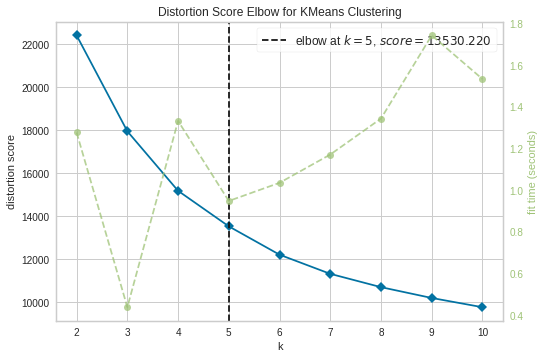

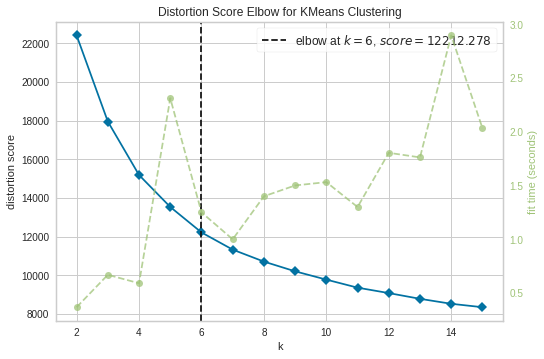

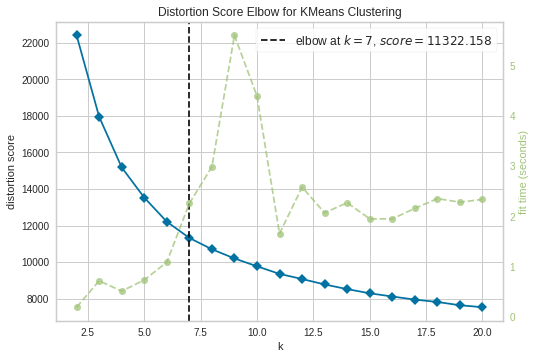

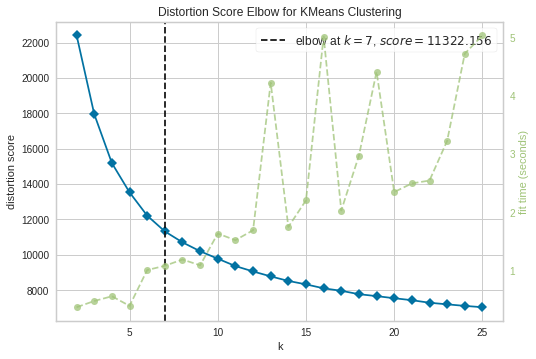

In [79]:
for i in range(10, 26, 5):
  #Ellbogen Methode
  elbow = KElbowVisualizer(KMeans(), k=i)
  elbow.fit(data_pca_90_kmeans)

  #Werte in das DataFrame schreiben
  new_row = {"k":i, "Cluster":elbow.elbow_value_}
  k_cluster_90_kmeans = k_cluster_90_kmeans.append(new_row, ignore_index=True)

  #Visualisierung
  elbow.show()

In [80]:
k_cluster_90_kmeans

k Cluster
0  10       5
1  15       6
2  20       7
3  25       7

In [81]:
#optimale Clusteranzahl laut Ellbogen Methode
optimalcluster_90_kmeans = int(k_cluster_90_kmeans.Cluster.mean().round(decimals=0))
optimalcluster_90_kmeans

6

###Silhouette Score

In [82]:
#DataFrame für die Silhouette Scores der verschiedenen Cluster
sScore_cluster_90_kmeans = pd.DataFrame(columns = ["Cluster", "SilhouetteScore"])

#Datentypen der Spalten festlegen
sScore_cluster_90_kmeans = sScore_cluster_90_kmeans.astype({'Cluster':'int', 'SilhouetteScore':'float'})

Cluster Anzahl:  2
Silhouette Score:  0.4746


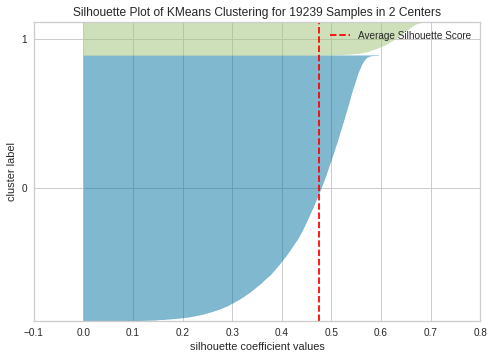



Cluster Anzahl:  3
Silhouette Score:  0.236


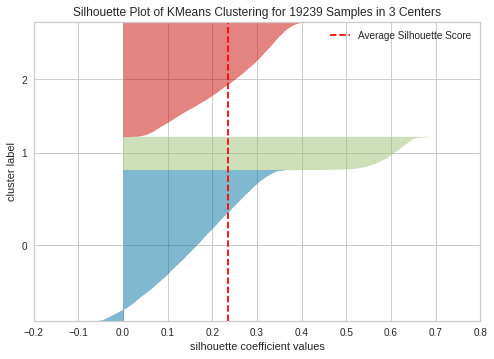



Cluster Anzahl:  4
Silhouette Score:  0.2382


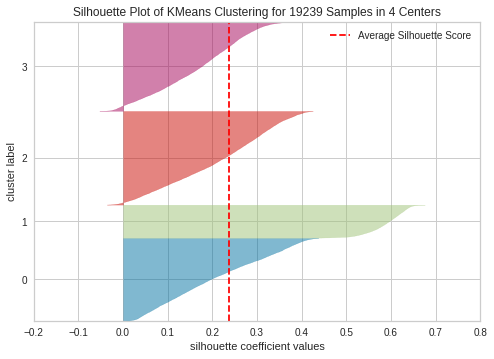

KeyboardInterrupt: ignored

In [83]:
for i in range(2, optimalcluster_90_kmeans+3, 1):
  #kMeans
  kmeans = KMeans(n_clusters = i, random_state=42)
  visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
  visualizer.fit(data_pca_90_kmeans)

  #Werte in das DataFrame schreiben
  new_row = {"Cluster":int(i), "SilhouetteScore":visualizer.silhouette_score_.round(decimals=4)}
  sScore_cluster_90_kmeans = sScore_cluster_90_kmeans.append(new_row, ignore_index=True)

  #Visualisierung
  print("Cluster Anzahl: ", i)
  print("Silhouette Score: ", visualizer.silhouette_score_.round(decimals=4))
  visualizer.show()
  print("\n")

In [ ]:
sScore_cluster_90_kmeans

In [ ]:
#größten Silhouette Score aus dem DataFrame wählen
max_sScore = max(sScore_cluster_90_kmeans['SilhouetteScore'])
print("Höchster Silhouette Score: ", max_sScore)

#die dazugehörige Clusteranzahl auslesen
optimal_cluster_from_sScore = int(sScore_cluster_90_kmeans.loc[sScore_cluster_90_kmeans['SilhouetteScore'] == max_sScore, 'Cluster'].item())
print("Die dazugehörige Clusteranzahl: ", optimal_cluster_from_sScore)

###K-Means

In [ ]:
#specify the number of clusters we got from silhouette score
kmeans_90 = KMeans(n_clusters = optimal_cluster_from_sScore)

In [ ]:
#fit the scaled data
kmeans_90 = kmeans_90.fit(data_pca_90_kmeans)

In [ ]:
#get the cluster labels
labels_90_kmeans = kmeans_90.predict(data_pca_90_kmeans)

In [ ]:
#get the centroid values
centroids_90_kmeans = kmeans_90.cluster_centers_

In [ ]:
#get the cluster values
clusters_90_kmeans = kmeans_90.labels_.tolist()

###Visualization

In [ ]:
#Cluster-Spalte hinzufügen
data_pca_90_kmeans['clusters'] = clusters_90_kmeans

#Namen der Spieler hinzufügen
data_pca_90_kmeans['names'] = names

In [ ]:
#Spalten umbenennen
data_pca_90_kmeans.columns = [f"pca_{i+1}" for i in range(pca_90_kmeans.n_components_)] + ['clusters', 'names']

In [245]:
#Daten für die Visualisierung setzen
pca_kmeans = pca_90_kmeans
df_kmeans = data_pca_90_kmeans

###2D Diagramme

In [ ]:
#Nicht alle Spaltenkombinationen werden geplottet
for i in range(1, pca_kmeans.n_components_-1):
  #Spalten für das Diagramm wählen
  x_axis = df_kmeans['pca_'+ str(i)] #component/column x in table
  y_axis = df_kmeans['pca_'+ str(i+1)] #component/column y in table

  #Diagramm Settings
  plt.figure(figsize=(10,8))
  sns.scatterplot(x_axis, y_axis, hue=df_kmeans['cluster'], palette ="deep")
  plt.title('Clusters mit PCA (90% Varianz)')

  #Anzeigen
  plt.show()

###3D Diagramme

In [ ]:
fig = px.scatter_3d(df_kmeans, x='pca_1', y='pca_2', z='pca_3', hover_name="names", hover_data=["names"], color='clusters')
fig.show()

In [ ]:
fig = px.scatter_3d(df_kmeans, x='pca_2', y='pca_3', z='pca_4', hover_name="names", hover_data=["names"], color='clusters')
fig.show()

##kMeans Clustering mit 70% Varianz ~ 4 Komponenten

###Elbow Method

To find the optimal number of cluster

In [ ]:
#DataFrame für die Werte von k der Ellbogen Methode
k_cluster_70_kmeans = pd.DataFrame(columns = ["k", "Cluster"])

In [ ]:
for i in range(10, 26, 5):
  #Ellbogen Methode
  elbow = KElbowVisualizer(KMeans(), k=i)
  elbow.fit(data_pca_70_kmeans)

  #Werte in das DataFrame schreiben
  new_row = {"k":i, "Cluster":elbow.elbow_value_}
  k_cluster_70_kmeans = k_cluster_70_kmeans.append(new_row, ignore_index=True)

  #Visualisierung
  elbow.show()

In [ ]:
k_cluster_70_kmeans

In [ ]:
#optimale Clusteranzahl laut Ellbogen Methode
optimalcluster_70_kmeans = int(k_cluster_70_kmeans.Cluster.mean().round(decimals=0))
optimalcluster_70_kmeans

###Silhouette Score

In [ ]:
#DataFrame für die Silhouette Scores der verschiedenen Cluster
sScore_cluster_70_kmeans = pd.DataFrame(columns = ["Cluster", "SilhouetteScore"])

#Datentypen der Spalten festlegen
sScore_cluster_70_kmeans = sScore_cluster_70_kmeans.astype({'Cluster':'int', 'SilhouetteScore':'float'})

In [ ]:
for i in range(2, optimalcluster_70_kmeans+3, 1):
  #kMeans
  kmeans = KMeans(n_clusters = i, random_state=42)
  visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
  visualizer.fit(data_pca_70_kmeans)

  #Werte in das DataFrame schreiben
  new_row = {"Cluster":int(i), "SilhouetteScore":visualizer.silhouette_score_.round(decimals=4)}
  sScore_cluster_70_kmeans = sScore_cluster_70_kmeans.append(new_row, ignore_index=True)

  #Visualisierung
  print("Cluster Anzahl: ", i)
  print("Silhouette Score: ", visualizer.silhouette_score_.round(decimals=4))
  visualizer.show()
  print("\n")

In [ ]:
sScore_cluster_70_kmeans

In [ ]:
#größten Silhouette Score aus dem DataFrame wählen
max_sScore = max(sScore_cluster_70_kmeans['SilhouetteScore'])
print("Höchster Silhouette Score: ", max_sScore)

#die dazugehörige Clusteranzahl auslesen
optimal_cluster_from_sScore = int(sScore_cluster_70_kmeans.loc[sScore_cluster_70_kmeans['SilhouetteScore'] == max_sScore, 'Cluster'].item())
print("Die dazugehörige Clusteranzahl: ", optimal_cluster_from_sScore)

###K-Means

In [ ]:
#specify the number of clusters we got from silhouette score
kmeans_70 = KMeans(n_clusters = optimal_cluster_from_sScore)

In [ ]:
#fit the scaled data
kmeans_70 = kmeans_70.fit(data_pca_70_kmeans)

In [ ]:
#get the cluster labels
labels_70_kmeans = kmeans_70.predict(data_pca_70_kmeans)

In [ ]:
#get the centroid values
centroids_70_kmeans = kmeans_70.cluster_centers_

In [ ]:
#get the cluster values
clusters_70_kmeans = kmeans_70.labels_.tolist()

###Visualization

In [ ]:
#Cluster-Spalte hinzufügen
data_pca_70_kmeans['cluster'] = clusters_70_kmeans

#Namen der Spieler hinzufügen
data_pca_70_kmeans['name'] = names

In [ ]:
#Spalten umbenennen
data_pca_70_kmeans.columns = [f"pca_{i+1}" for i in range(pca_70_kmeans.n_components_)] + ['cluster', 'names']

In [ ]:
data_pca_70_kmeans.head()

###2D Diagramme

In [ ]:
#Nicht alle Spaltenkombinationen werden geplottet
for i in range(1, pca_70_kmeans.n_components_-1):
  #Spalten für das Diagramm wählen
  x_axis = data_pca_70_kmeans['pca_'+ str(i)] #component/column x in table
  y_axis = data_pca_70_kmeans['pca_'+ str(i+1)] #component/column y in table

  #Diagramm Settings
  plt.figure(figsize=(10,8))
  sns.scatterplot(x_axis, y_axis, hue=data_pca_70_kmeans['cluster'], palette ="deep")
  plt.title('Clusters mit PCA (70% Varianz)')

  #Anzeigen
  plt.show()

###3D Diagramme

In [ ]:
fig = px.scatter_3d(data_pca_70_kmeans, x='pca_1', y='pca_2', z='pca_3', hover_name="names", hover_data=["names"], color='cluster')
fig.show()

In [ ]:
fig = px.scatter_3d(data_pca_70_kmeans, x='pca_2', y='pca_3', z='pca_4', hover_name="names", hover_data=["names"], color='cluster')
fig.show()

#DBScan Clustering

##Daten kopieren

In [195]:
data_scaled_dbscan = data_scaled
data_scaled_df_dbscan = data_scaled_df

##PCA

###PCA mit 90% Varianz ~ 13 Komponenten

In [196]:
pca_90_dbscan = PCA(n_components=0.9) #90% Varianz nehmen
data_pca_90_dbscan = pd.DataFrame(pca_90_dbscan.fit_transform(data_scaled_dbscan))

In [197]:
data_pca_90_dbscan.head()

0         1         2         3         4         5         6   \
0 -1.799933 -1.303398  0.684457  0.854284 -0.249590 -0.129964  0.025410   
1 -1.670038 -0.816557  0.752538  1.004640  0.361214 -0.333538 -0.154012   
2 -1.705546 -1.130828  0.726772  0.933675  0.296940 -0.419569 -0.245382   
3 -1.773266 -1.201199  0.664909  0.704449 -0.362723 -0.237234 -0.080222   
4 -1.907847 -0.410986  0.799741  1.073791 -0.293861  0.080018 -0.026147   

         7         8         9         10        11        12  
0  0.263021 -0.078782  0.211687 -0.046872  0.415777  0.548527  
1  0.223116 -0.160371  0.216789 -0.101732  0.402291  0.356355  
2  0.184944 -0.163661  0.192166 -0.118860  0.279812  0.508242  
3  0.231102 -0.268392  0.483457  0.116421  0.380749  0.503941  
4  0.267423 -0.105235  0.417341  0.196973  0.252377  0.185732

###PCA mit 70% Varianz ~ 4 Komponenten

In [198]:
pca_70_dbscan = PCA(n_components=0.7)
data_pca_70_dbscan = pd.DataFrame(pca_70_dbscan.fit_transform(data_scaled_dbscan)) #runs the model on the data

In [199]:
data_pca_70_dbscan.head()

0         1         2         3
0 -1.799933 -1.303398  0.684457  0.854284
1 -1.670038 -0.816557  0.752538  1.004640
2 -1.705546 -1.130828  0.726772  0.933675
3 -1.773266 -1.201199  0.664909  0.704449
4 -1.907847 -0.410986  0.799741  1.073791

##Nearest Neighbor

###Nearest Neighbors mit 90% Varianz ~ 13 Komponenten

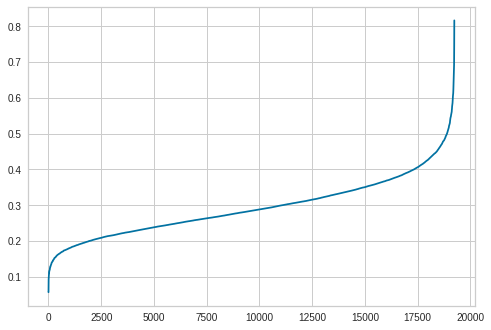

In [200]:
from sklearn.neighbors import NearestNeighbors

#calculate the distance from each point to its closest neighbor
nN_90 = NearestNeighbors(n_neighbors=500)

#fit the nearest neighbor
nN_90_fit = nN_90.fit(data_pca_90_dbscan)

#returns two arrays: distance to the closest n_neighbors point and index for each point
distances_90, indices_90 = nN_90_fit.kneighbors(data_pca_90_dbscan)

#sort the distance and plot it
distances_90 = np.sort(distances_90, axis=0)
distances_90 = distances_90[:,1]
plt.plot(distances_90)

Hier kann man ablesen wie der Parameter eps für den DBScan gewählt werden sollte, genau da wo sich die Steigung der Kurve der 0 nähert (~0.55).


###Nearest Neighbors mit 70% Varianz ~ 4 Komponenten

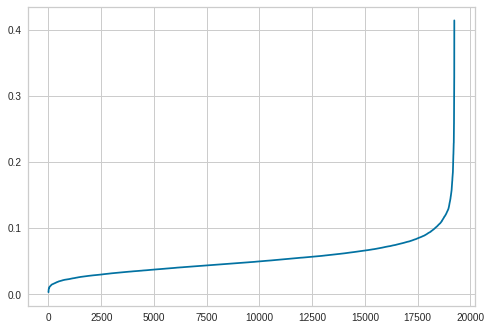

In [201]:
from sklearn.neighbors import NearestNeighbors

#calculate the distance from each point to its closest neighbor
nN_70 = NearestNeighbors(n_neighbors=500)

#fit the nearest neighbor
nN_70_fit = nN_70.fit(data_pca_70_dbscan)

#returns two arrays: distance to the closest n_neighbors point and index for each point
distances_70, indices_70 = nN_70_fit.kneighbors(data_pca_70_dbscan)

#sort the distance and plot it
distances_70 = np.sort(distances_70, axis=0)
distances_70 = distances_70[:,1]
plt.plot(distances_70)

Hier kann man ablesen wie der Parameter eps für den DBScan gewählt werden sollte, genau da wo sich die Steigung der Kurve der 0 nähert (~0.15).


##DBScan Clustering

###DBScan Clustering mit 90% Varianz ~ 13 Komponenten

**Value for min_samples**


As a rule of thumb, a minimum minPts can be derived from the number of dimensions D in the data set, as **minPts ≥ D + 1**. The low value minPts = 1 does not make sense, as then every point on its own will already be a cluster. With minPts ≤ 2, the result will be the same as of hierarchical clustering with the single link metric, with the dendrogram cut at height ε. Therefore, minPts must be chosen at least 3. However, larger values are usually better for data sets with noise and will yield more significant clusters. As a rule of thumb, **minPts = 2·dim** can be used, but it may be necessary to choose larger values for very large data, for noisy data or for data that contains many duplicates.

**Value for ε**

The value for ε can then be chosen by using a **k-distance graph**, plotting the distance to the k = minPts-1 nearest neighbor ordered from the largest to the smallest value. Good values of ε are where this plot shows an “elbow”: if ε is chosen much too small, a large part of the data will not be clustered; whereas for a too high value of ε, clusters will merge and the majority of objects will be in the same cluster. In general, small values of ε are preferable, and as a rule of thumb, only a small fraction of points should be within this distance of each other.

In [202]:
#eps Wert aus Nearest Neighbor 90% Methode
#min_samples rule of thumb 1: 2*dim = 2*13 = 26
#min_samples rule of thumb2: min_samples ≥ D + 1 = min_samples ≥ 13 + 1 = 14
db_90 = DBSCAN(eps=0.55, min_samples=14).fit(data_scaled_dbscan)

In [203]:
data_pca_90_dbscan['clusters'] = db_90.labels_
data_pca_90_dbscan['names'] = names
data_pca_90_dbscan.columns = [f"pca_{i+1}" for i in range(pca_90_dbscan.n_components_)] + ['clusters', 'names']
data_pca_90_dbscan.head()

pca_1     pca_2     pca_3     pca_4     pca_5     pca_6     pca_7  \
0 -1.799933 -1.303398  0.684457  0.854284 -0.249590 -0.129964  0.025410   
1 -1.670038 -0.816557  0.752538  1.004640  0.361214 -0.333538 -0.154012   
2 -1.705546 -1.130828  0.726772  0.933675  0.296940 -0.419569 -0.245382   
3 -1.773266 -1.201199  0.664909  0.704449 -0.362723 -0.237234 -0.080222   
4 -1.907847 -0.410986  0.799741  1.073791 -0.293861  0.080018 -0.026147   

      pca_8     pca_9    pca_10    pca_11    pca_12    pca_13  clusters  \
0  0.263021 -0.078782  0.211687 -0.046872  0.415777  0.548527        -1   
1  0.223116 -0.160371  0.216789 -0.101732  0.402291  0.356355        -1   
2  0.184944 -0.163661  0.192166 -0.118860  0.279812  0.508242        -1   
3  0.231102 -0.268392  0.483457  0.116421  0.380749  0.503941        -1   
4  0.267423 -0.105235  0.417341  0.196973  0.252377  0.185732        -1   

               names  
0           L. Messi  
1     R. Lewandowski  
2  Cristiano Ronaldo  
3          Neymar Jr  
4       K. De Bruyne

In [204]:
#Clusteranzahl
len(data_pca_90_dbscan.clusters.unique())

20

###DBScan Clustering mit 70% Varianz ~ 4 Komponenten

**Value for min_samples**


As a rule of thumb, a minimum minPts can be derived from the number of dimensions D in the data set, as **minPts ≥ D + 1**. The low value minPts = 1 does not make sense, as then every point on its own will already be a cluster. With minPts ≤ 2, the result will be the same as of hierarchical clustering with the single link metric, with the dendrogram cut at height ε. Therefore, minPts must be chosen at least 3. However, larger values are usually better for data sets with noise and will yield more significant clusters. As a rule of thumb, **minPts = 2·dim** can be used, but it may be necessary to choose larger values for very large data, for noisy data or for data that contains many duplicates.

**Value for ε**

The value for ε can then be chosen by using a **k-distance graph**, plotting the distance to the k = minPts-1 nearest neighbor ordered from the largest to the smallest value. Good values of ε are where this plot shows an “elbow”: if ε is chosen much too small, a large part of the data will not be clustered; whereas for a too high value of ε, clusters will merge and the majority of objects will be in the same cluster. In general, small values of ε are preferable, and as a rule of thumb, only a small fraction of points should be within this distance of each other.

In [205]:
#eps Wert aus Nearest Neighbor 90% Methode
#min_samples rule of thumb 1: 2*dim = 2*4 = 8
#min_samples rule of thumb2: min_samples ≥ D + 1 = min_samples ≥ 4 + 1 = 5
db_70 = DBSCAN(eps=0.15, min_samples=5).fit(data_scaled_dbscan)

In [206]:
data_pca_70_dbscan['clusters'] = db_70.labels_
data_pca_70_dbscan['names'] = names
data_pca_70_dbscan.columns = [f"pca_{i+1}" for i in range(pca_70_dbscan.n_components_)] + ['clusters', 'names']
data_pca_70_dbscan.head()

pca_1     pca_2     pca_3     pca_4  clusters              names
0 -1.799933 -1.303398  0.684457  0.854284        -1           L. Messi
1 -1.670038 -0.816557  0.752538  1.004640        -1     R. Lewandowski
2 -1.705546 -1.130828  0.726772  0.933675        -1  Cristiano Ronaldo
3 -1.773266 -1.201199  0.664909  0.704449        -1          Neymar Jr
4 -1.907847 -0.410986  0.799741  1.073791        -1       K. De Bruyne

In [207]:
#Clusteranzahl
len(data_pca_70_dbscan.clusters.unique())

1

##Grid Search

In [223]:
#Parameter für die Schleife festlegen
eps_range = np.arange(0.4, 1, 0.1)
min_sample_range = np.arange(4, 16, 1)

#Arrays für den Plot
dbscan_silhouette = []
dbscan_ncluster = []

In [224]:
for i in eps_range:
  for j in min_sample_range:
    #DBScan
    dbscan = DBSCAN(eps=i, min_samples=j).fit(data_scaled_dbscan)
    #Arrays für den Plot füllen
    dbscan_ncluster.append(len(np.unique(dbscan.labels_)))
    if (len(np.unique(dbscan.labels_))==1):
      dbscan_silhouette.append(0)
    else:
      dbscan_silhouette.append(silhouette_score(data_scaled_dbscan, dbscan.labels_))


dbscan_silhouette = np.asarray(dbscan_silhouette).reshape(len(eps_range), len(min_sample_range))
dbscan_ncluster = np.asarray(dbscan_ncluster).reshape(len(eps_range), len(min_sample_range))

dbscan_silhouette_df = pd.DataFrame(dbscan_silhouette, columns = list(min_sample_range), index = list(eps_range))
dbscan_ncluster_df = pd.DataFrame(dbscan_ncluster, columns = list(min_sample_range), index = list(eps_range))

Text(0.5, 1.0, 'Number of Clusters')

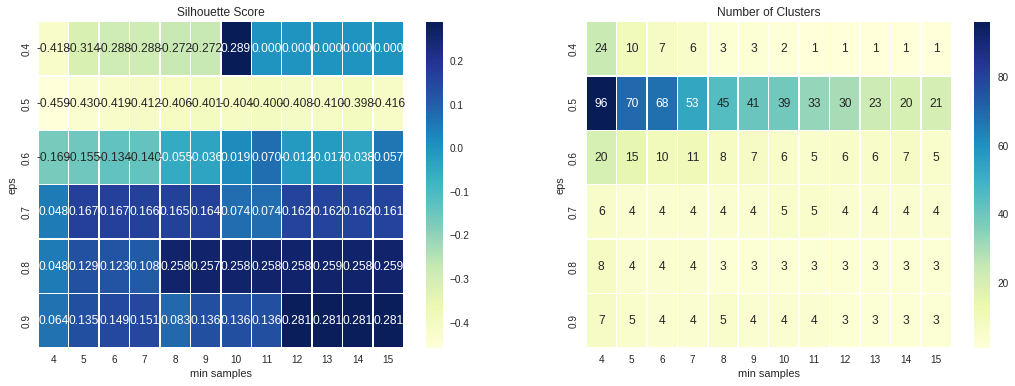

In [225]:
plt.figure(figsize = (18,6))
plt.subplot(1, 2, 1)
ax = sns.heatmap(dbscan_silhouette_df,
                 annot = True, linewidths= .5,
                 cmap = "YlGnBu",
                 yticklabels = dbscan_silhouette_df.index.values.round(2),
                 fmt = '0.3f')

ax.set_xlabel("min samples")
ax.set_ylabel('eps')
plt.title("Silhouette Score")

plt.subplot(1, 2, 2)
ax = sns.heatmap(dbscan_ncluster_df,
                 annot = True,
                 linewidths= .5,
                 cmap = "YlGnBu",
                 yticklabels = dbscan_ncluster_df.index.values.round(2))

ax.set_xlabel("min samples")
ax.set_ylabel('eps')
plt.title("Number of Clusters")

##Visualisierung

In [236]:
#Daten für die Visualisierung
pca_dbscan = pca_90_dbscan
df_dbscan = data_pca_90_dbscan

###2D Diagramme

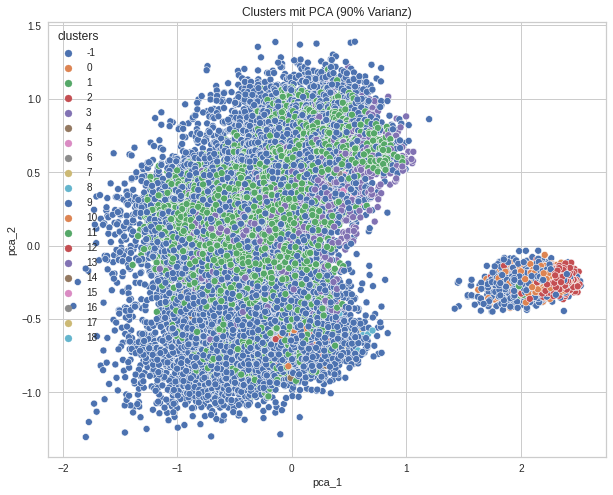

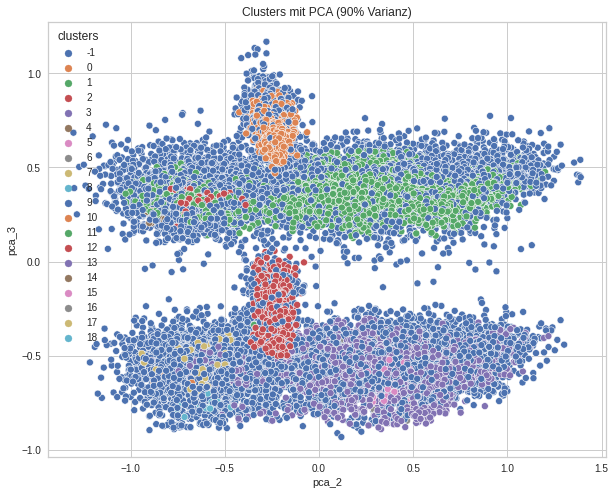

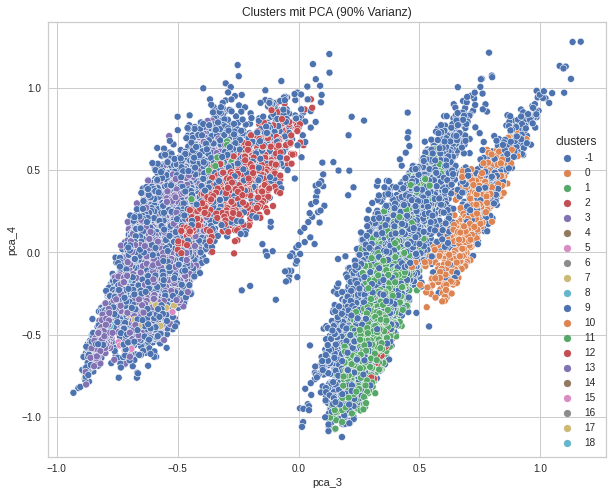

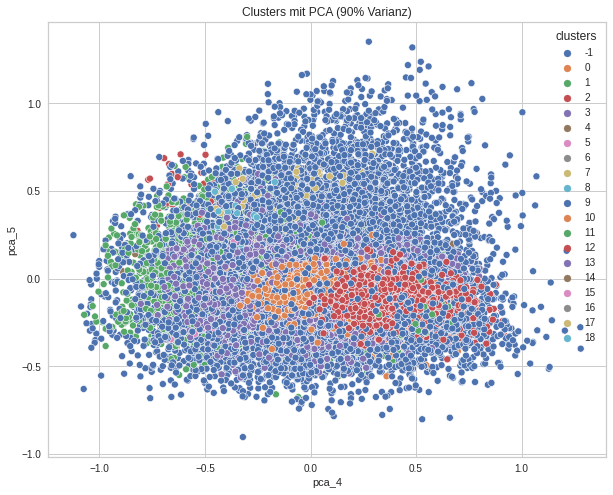

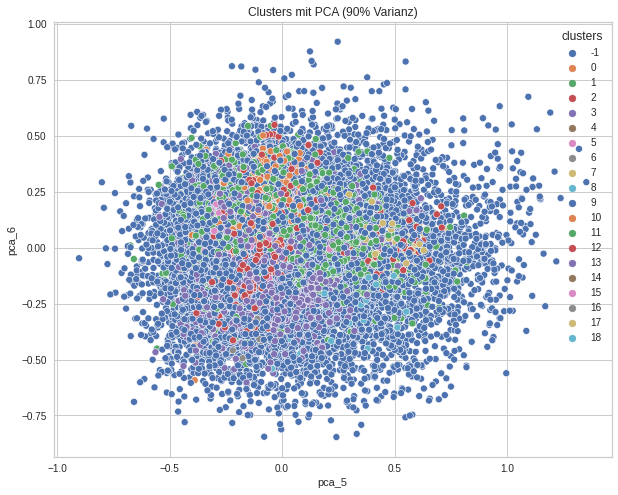

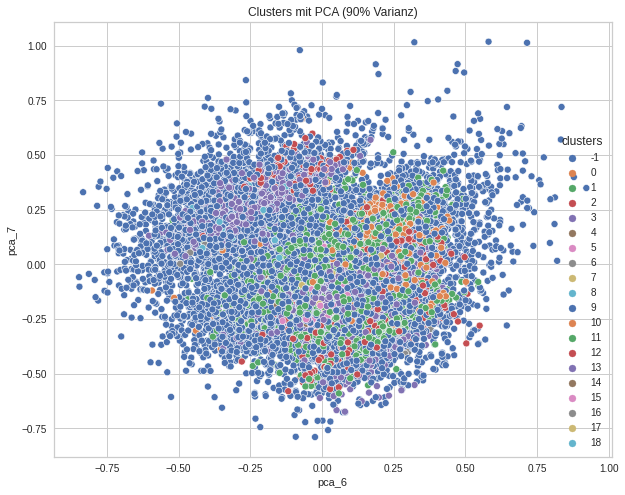

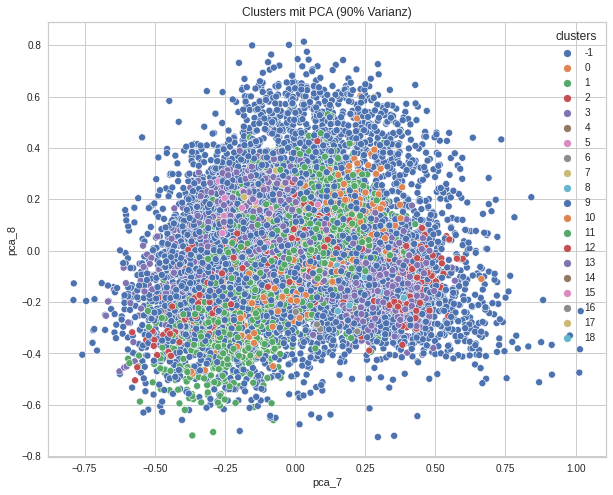

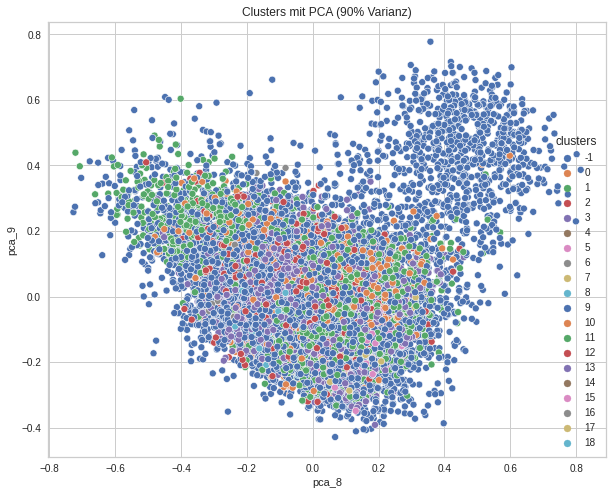

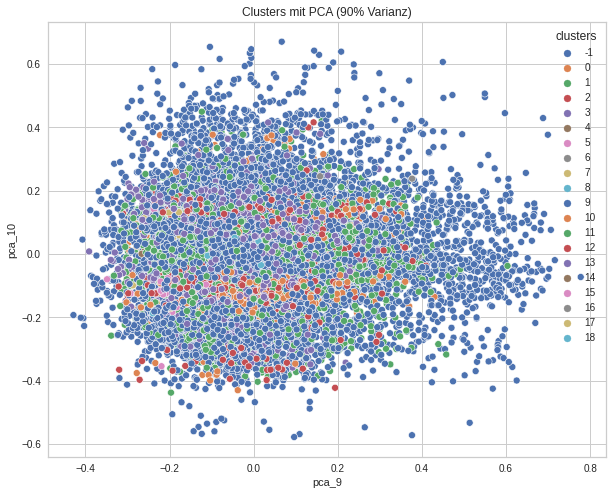

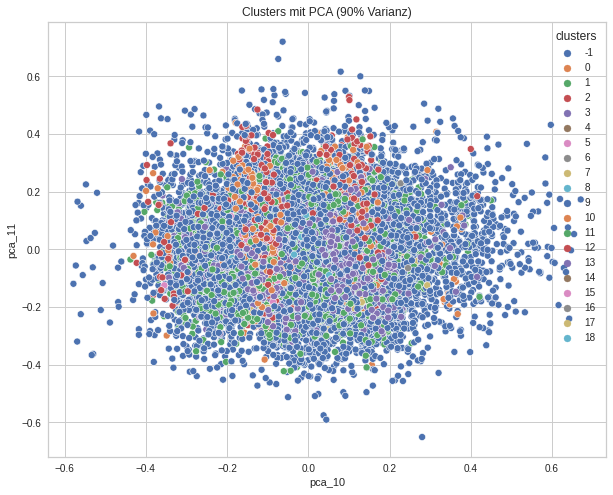

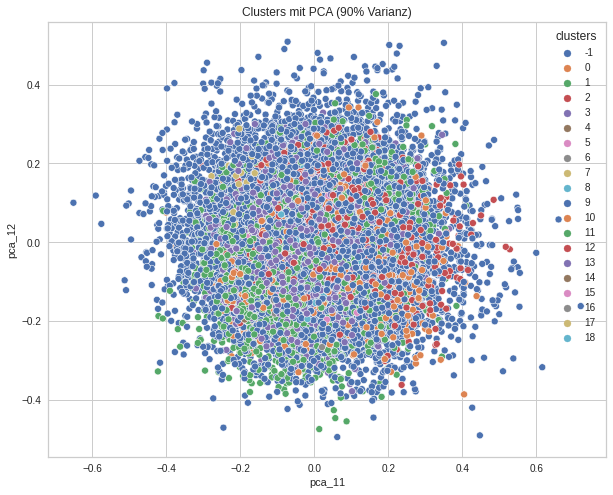

In [237]:
#Nicht alle Spaltenkombinationen werden geplottet
for i in range(1, pca_dbscan.n_components_-1):
  #Spalten für das Diagramm wählen
  x_axis = df_dbscan['pca_'+ str(i)] #component/column x in table
  y_axis = df_dbscan['pca_'+ str(i+1)] #component/column y in table

  #Diagramm Settings
  plt.figure(figsize=(10,8))
  sns.scatterplot(x_axis, y_axis, hue=df_dbscan['clusters'], palette ="deep")
  plt.title('Clusters mit PCA (90% Varianz)')

  #Anzeigen
  plt.show()

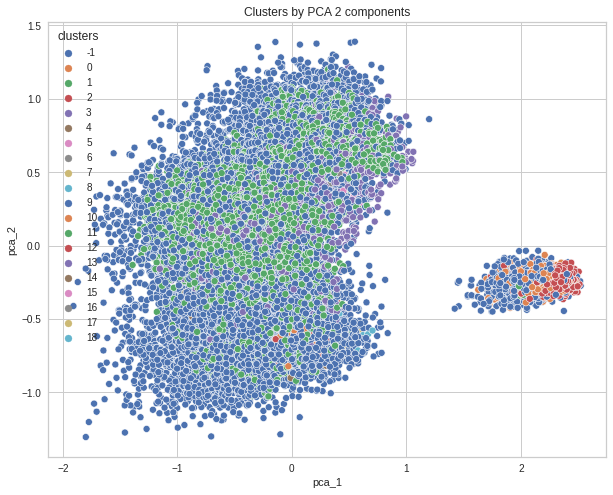

In [227]:
x_axis = data_pca_90_dbscan['pca_1'] #component/column x in table
y_axis = data_pca_90_dbscan['pca_2'] #component/column y in table
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=data_pca_90_dbscan['clusters'], palette ="deep")
plt.title('Clusters by PCA 2 components')
plt.show()

###3D Diagramme

In [244]:
fig = px.scatter_3d(df_dbscan, x='pca_1', y='pca_2', z='pca_3', hover_name="names", hover_data=["names"], color='clusters')
fig.show()

#Hierarchical Clustering  **BEARBEITEN**

In [226]:
data = data_players[['short_name', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'height_cm', 'weight_kg', 'club_team_id', 'league_level',
       'club_jersey_number', 'club_contract_valid_until', 'nationality_id',
       'nation_team_id', 'nation_jersey_number', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']]

data = data.fillna(data.mean())
names = data.short_name.tolist()
data = data.drop(['short_name'], axis=1)

x = data.values

##Feature Scaling

In [227]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_norm = pd.DataFrame(x_scaled)

## Complete Linkage Clustering

In [228]:
mergings = linkage(x_norm, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

KeyboardInterrupt: ignored

In [ ]:
cluster_labels_complete = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels_complete

In [ ]:
data['Cluster_Labels_complete'] = cluster_labels_complete
data.head()

In [ ]:
sns.boxplot(x='Cluster_Labels_complete', y='overall', data=data)

## Average Linkage Clustering

In [ ]:
data = data_players[['short_name', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'height_cm', 'weight_kg', 'club_team_id', 'league_level',
       'club_jersey_number', 'club_contract_valid_until', 'nationality_id',
       'nation_team_id', 'nation_jersey_number', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']]

data = data.fillna(data.mean())
names = data.short_name.tolist()
data = data.drop(['short_name'], axis=1)

x = data.values

In [ ]:
mergings = linkage(x_norm, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
cluster_labels_average = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels_average

In [ ]:
data['Cluster_Labels_average'] = cluster_labels_average
data.head()

In [ ]:
sns.boxplot(x='Cluster_Labels_average', y='overall', data=data)

## Ward Linkage Clustering

In [ ]:
data = data_players[['short_name', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'height_cm', 'weight_kg', 'club_team_id', 'league_level',
       'club_jersey_number', 'club_contract_valid_until', 'nationality_id',
       'nation_team_id', 'nation_jersey_number', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']]

data = data.fillna(data.mean())
names = data.short_name.tolist()
data = data.drop(['short_name'], axis=1)

x = data.values

In [ ]:
mergings = linkage(x_norm, method="ward", metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
cluster_labels_average = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels_average

In [ ]:
data['Cluster_Labels_average'] = cluster_labels_average
data.head()

In [ ]:
sns.boxplot(x='Cluster_Labels_average', y='overall', data=data)

#MeanShift  **BEARBEITEN**

In [119]:
data = data_players[['short_name', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'height_cm', 'weight_kg', 'club_team_id', 'league_level',
       'club_jersey_number', 'club_contract_valid_until', 'nationality_id',
       'nation_team_id', 'nation_jersey_number', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']]

data = data.fillna(data.mean())
names = data.short_name.tolist()
data = data.drop(['short_name'], axis=1)

x = data.values

In [120]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_norm = pd.DataFrame(x_scaled)

In [124]:
mshift_silhouette = []
mshift_ncluster = []

bandwidth_range = np.arange(0.9, 1.4, 0.1)

for i in bandwidth_range:

    mshift = MeanShift(bandwidth = i, n_jobs = -1).fit(data_scaled)
    mshift_silhouette.append(silhouette_score(x_scaled, mshift.labels_)) 
    mshift_ncluster.append(len(np.unique(mshift.labels_)))   

mshift_silhouette = np.asarray(mshift_silhouette).reshape(len(mshift_silhouette), 1) 
mshift_ncluster = np.asarray(mshift_ncluster).reshape(len(mshift_ncluster), 1) 

KeyboardInterrupt: ignored

#Performance  **BEARBEITEN**

*   Silhouette Coefficient: 1 best, -1 worst
*   Davies Bouldin Score: low best
*   Dunn index: 




In [ ]:
#KMeans
print('Silhouette Coefficient: ', visualizer3_2d.silhouette_score_)
print('Davies Bouldin Score: ', davies_bouldin_score(data_2d, kmeans.labels_))

In [ ]:
#DBScan
print('Silhouette Coefficient: ', silhouette_score(data_scaled, db.labels_))
print('Davies Bouldin Score: ', davies_bouldin_score(data_scaled, db.labels_))

In [ ]:
#Hierarchical Clustering
##Complete Linkage
print('Silhouette Coefficient: ', silhouette_score(data_scaled, labels))
print('Davies Bouldin Score: ', davies_bouldin_score(data_scaled, db.labels_))

##Average Linkage
print('Silhouette Coefficient: ', silhouette_score(data_scaled, labels))
print('Davies Bouldin Score: ', davies_bouldin_score(data_scaled, db.labels_))

##Ward
print('Silhouette Coefficient: ', silhouette_score(data_scaled, labels))
print('Davies Bouldin Score: ', davies_bouldin_score(data_scaled, db.labels_))
